In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Hence last three columns are mostly null so it is better to remove them

In [5]:
# drop last three column
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [6]:
df.sample(10)

,v1,v2
210,ham,"What's up bruv, hope you had a great break. Do..."
4323,ham,I am not having her number sir
4818,ham,Got smaller capacity one? Quite ex...
36,ham,"Oops, I'll let you know when my roommate's done"
3907,ham,Sounds like a plan! Cardiff is still here and ...
3127,ham,would u fuckin believe it they didnt know i ha...
5070,ham,As in different styles?
284,ham,Yeah I think my usual guy's still passed out f...
426,ham,aathi..where are you dear..
1410,ham,Pls speak to that customer machan.


In [7]:
df = df.rename(columns={"v1":"target","v2":"text"})

In [8]:
df['target']=df['target'].map({'ham':0,'spam':1})

In [9]:
df.sample(10)


,target,text
3583,1,Hi 07734396839 IBH Customer Loyalty Offer: The...
4155,0,"Yo, call me when you get the chance, a friend ..."
4911,0,I am on the way to tirupur.
3547,0,Single line with a big meaning::::: \Miss anyt...
2694,0,Hey sexy buns! What of that day? No word from ...
1699,0,Ok...
2014,0,Ambrith..madurai..met u in arun dha marrge..re...
1634,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
2162,0,1) Go to write msg 2) Put on Dictionary mode 3...
4938,0,Tomarrow i want to got to court. At &lt;DECIM...


Missing values checking

In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

Checking for duplicate values

In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep="first")

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

# EDA

In [15]:
df["target"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    4516
1     653
Name: target, dtype: int64>

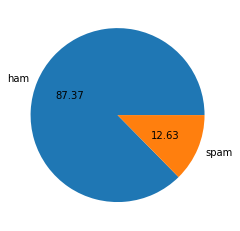

In [16]:
plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vanshika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df["num_char"] = df["text"].apply(len)

In [19]:
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df["num_sent"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()


,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[["num_char","num_words","num_sent"]].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
df[df["target"]==0][["num_char","num_words","num_sent"]].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
df[df["target"]==1][["num_char","num_words","num_sent"]].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [26]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

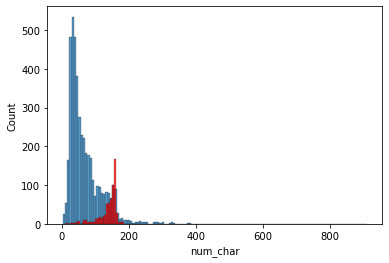

In [27]:
sns.histplot(df[df["target"]==0]["num_char"])
sns.histplot(df[df["target"]==1]["num_char"], color="red")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

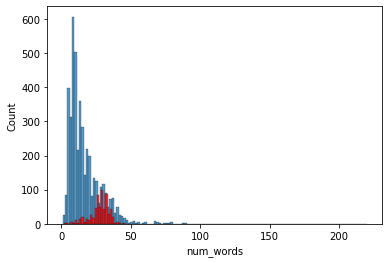

In [28]:
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="red")

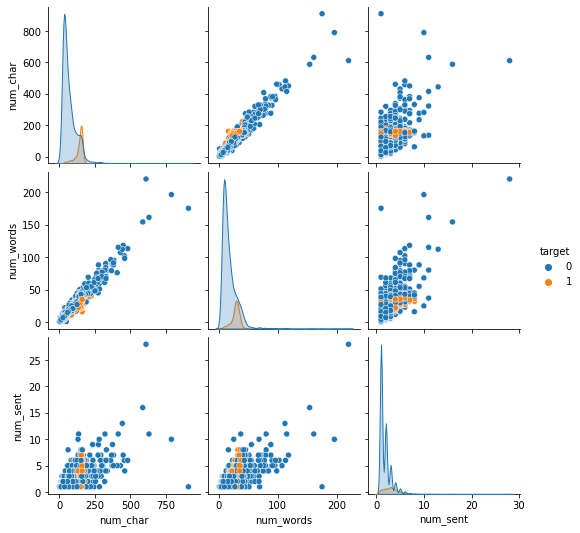

In [29]:
sns.pairplot(df,hue="target")

<AxesSubplot:>

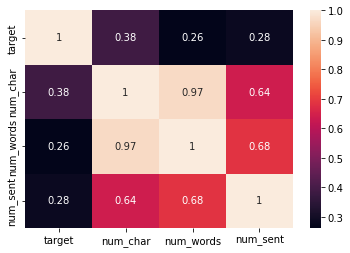

In [30]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing 
* lower case
* tokenization
* Removing special char
* Removing stopwords and punctuation
* stemming

In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import stopwords

import string


In [32]:

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
            
    
            
    return " ".join(y)

In [33]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [34]:
df["transformed_text"] = df["text"].apply(transform_text)

In [35]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [37]:
len(spam_corpus)

9939

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


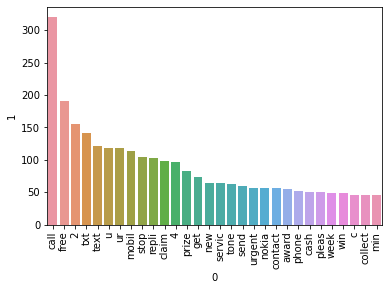

In [38]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [40]:
len(ham_corpus)

35394

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


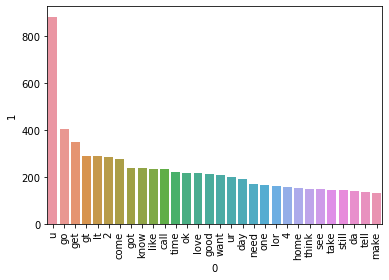

In [41]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


# Model Building


In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [43]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [44]:
X.shape

(5169, 3000)

In [45]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [49]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [50]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [51]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [52]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [53]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [55]:
clfs = {
    'Support Vector Machine' : svc,
    'K Neighbors Classifier' : knc, 
    'Naive Bayes': mnb, 
    'Decision Tree': dtc, 
    'Logistic Regression': lrc, 
    'Random Forest': rfc
}

In [56]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [57]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [58]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Support Vector Machine
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  K Neighbors Classifier
Accuracy -  0.9052224371373307
Precision -  1.0
For  Naive Bayes
Accuracy -  0.9709864603481625
Precision -  1.0
For  Decision Tree
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  Logistic Regression
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  Random Forest
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551


In [59]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,K Neighbors Classifier,0.905222,1.000000
2,Naive Bayes,0.970986,1.000000
5,Random Forest,0.974855,0.982759
0,Support Vector Machine,0.975822,0.974790
4,Logistic Regression,0.958414,0.970297
3,Decision Tree,0.933269,0.841584


In [60]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,K Neighbors Classifier,Accuracy,0.905222
1,Naive Bayes,Accuracy,0.970986
2,Random Forest,Accuracy,0.974855
3,Support Vector Machine,Accuracy,0.975822
4,Logistic Regression,Accuracy,0.958414
5,Decision Tree,Accuracy,0.933269
6,K Neighbors Classifier,Precision,1.000000
7,Naive Bayes,Precision,1.000000
8,Random Forest,Precision,0.982759
9,Support Vector Machine,Precision,0.974790


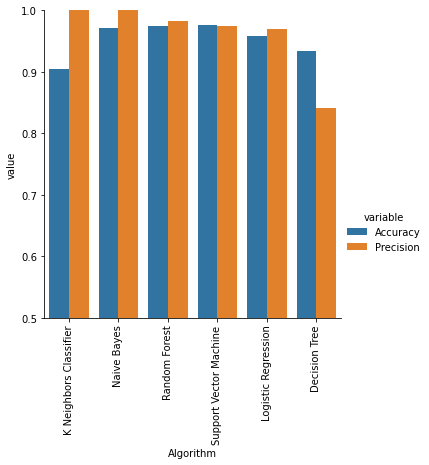

In [61]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))